In [1]:
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from sklearn import gaussian_process as gp

DE_PRED = 'min_delta_E_Pred'
DE_TRUE = 'minimal_delta_E_True'
Z = 'Z'
TRUE_N = 'True_N'
PRED_N = 'Pred_N'
ERROR = 'error'
df = pd.read_csv(r'C:\Users\dor00\PycharmProjects\Weight-Shape-Decomposition\data_processed\test1_1toinf')



In [2]:
df.sort_values('True_N')

,Unnamed: 0,id,Z,True_N,Pred_N,minimal_delta_E_True,min_delta_E_Pred,sum_3d
911,911,08_516,10,1,4,0.000000,0.083305,0.054255
155,155,05_348,10,1,3,0.000000,0.597772,0.069959
551,551,05_784,10,1,1,0.000000,0.000000,0.038355
162,162,05_747,10,1,2,0.000000,0.073489,0.027809
849,849,05_958,10,1,2,0.000000,0.083305,0.046504
...,...,...,...,...,...,...,...,...
581,581,05_253,10,149,31,0.000013,0.041386,10.366850
553,553,05_787,10,151,28,0.000343,0.060391,10.900403
760,760,05_428,10,154,33,0.000017,0.035893,10.764201
806,806,05_560,10,158,29,0.000904,0.056956,12.741758


[0.10849239 0.00506257]


c:\users\dor00\pycharmprojects\weight-shape-decomposition\venv\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\dor00\AppData\Local\Temp\ipykernel_5620\2572301572.py:8: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a+b * x**2) - np.sqrt(a)


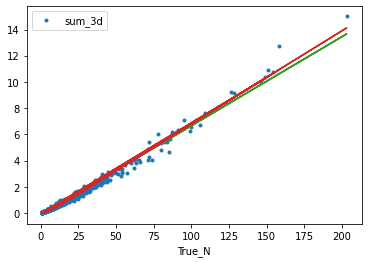

In [12]:
def linear(x, a, b):
    return a * x + b

def parabolic(x, a, b, c):
    return a * x ** 2 + b * x + c

def fit1(x, a, b):
    return np.sqrt(a+b * x**2) - np.sqrt(a)

ax = df.plot(y='sum_3d', x=TRUE_N, style='.')

x_name = TRUE_N
y_name = 'sum_3d'
popt, _ = curve_fit(linear, df[x_name], df[y_name])
y_pred = linear(df[x_name], *popt)
ax.plot(df[x_name], y_pred)

x_name = TRUE_N
y_name = 'sum_3d'
popt, _ = curve_fit(linear, df[x_name], df[y_name])
y_pred = linear(df[x_name], *popt)
ax.plot(df[x_name], y_pred)

x_name = TRUE_N
y_name = 'sum_3d'
popt, _ = curve_fit(fit1, df[x_name], df[y_name])
y_pred = fit1(df[x_name], *popt)
ax.plot(df[x_name], y_pred)

print(popt)

In [35]:
kernel = gp.kernels.ConstantKernel(1.0, (1e-1, 1e3)) * gp.kernels.RBF(10.0, (1e-3, 1e3))
model = gp.GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=10, alpha=0.1, normalize_y=True)
x, y = df[x_name].to_numpy(), df[y_name].to_numpy()
model.fit(x[:, np.newaxis], y[:, np.newaxis])
params = model.kernel_.get_params()
y_pred, std = model.predict(x[:, np.newaxis], return_std=True)
plt.plot(df[x_name], std[0, :])
# test = df[x_name][:, np.newaxis]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [ ]:
df.plot(x=DE_TRUE, y=ERROR, style='.', color=(1, 0, 0, 0.1))
plt.show()